In [23]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random
from pathlib import Path

In [28]:
Shoes_dir =Path("D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\boots")
flip_lops_dir=Path("D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\flip_flops")
loafer_dir=Path("D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\loafers")
sandals_dir=Path("D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\sandals")
sneakers_dir=Path("D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\sneakers")
soccer_shoes_dir=Path("D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\soccer_shoes")

In [29]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

In [32]:
shoes_df=generate_df(Shoes_dir,label='Shoes')
flip_lops_df=generate_df(flip_lops_dir,label="Flip Lops")
loafer_df=generate_df(loafer_dir,label="Loafers")
sandals_df=generate_df(sandals_dir,label="Sandals")
sneakers_df=generate_df(sneakers_dir,label="Sneakers")
soccer_shoes_df=generate_df(soccer_shoes_dir,label="Soccer shoes")

In [33]:
df=pd.concat([shoes_df,flip_lops_df,loafer_df,sandals_df,sneakers_df,soccer_shoes_df],axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [34]:
df

,Filepath,Label
0,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Sneakers
1,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Sneakers
2,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Shoes
3,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Sneakers
4,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Sneakers
...,...,...
476,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Sneakers
477,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Shoes
478,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Sneakers
479,D:\DATA SCIENCE\Kaggle Projects\13.SHOE CLASSI...,Sneakers


In [35]:
import cv2
image = cv2.imread("D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\boots\\image8.jpeg")

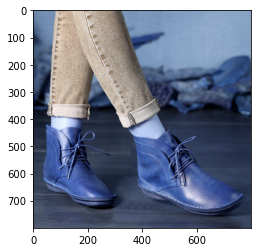

In [36]:
plt.imshow(image)

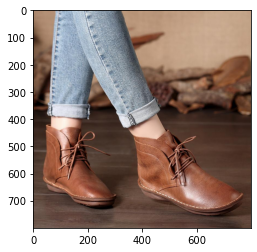

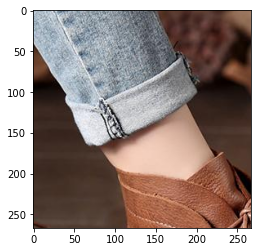

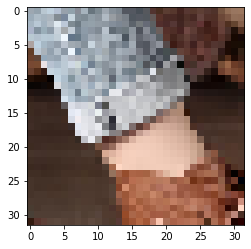

In [37]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()
sp=image.shape

image2=image[(sp[0]//3):(sp[0]*2//3),(sp[1]//3):(sp[1]*2//3),:]
plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
plt.show()

image3=cv2.resize(image2,dsize=(32,32),interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
train_df, validation_df = train_test_split(df,train_size=0.7,shuffle=True,random_state=42)

In [39]:
train_df.shape


(336, 2)

In [40]:
validation_df.shape

(145, 2)

In [69]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [70]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training')

Found 336 validated image filenames belonging to 6 classes.


In [ ]:
val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation')

In [71]:
test_data = train_gen.flow_from_dataframe(
    validation_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42)

Found 145 validated image filenames belonging to 6 classes.


In [73]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [78]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [100]:
model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(), 
    Dense(6, activation="softmax")
    
])

In [101]:
model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(), 
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [102]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [103]:
history_1 = model_1.fit(train_data, 
            epochs=10,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = len(test_data)
)

Epoch 1/10
11/11 [==============================] - 22s 2s/step - loss: 1.4633 - accuracy: 0.4315 - val_loss: 1.3852 - val_accuracy: 0.5586
Epoch 2/10
11/11 [==============================] - 23s 2s/step - loss: 1.3150 - accuracy: 0.5060 - val_loss: 1.3977 - val_accuracy: 0.5586
Epoch 3/10
11/11 [==============================] - 23s 2s/step - loss: 1.2283 - accuracy: 0.5238 - val_loss: 1.3348 - val_accuracy: 0.5310
Epoch 4/10
11/11 [==============================] - 21s 2s/step - loss: 1.1261 - accuracy: 0.5863 - val_loss: 1.3005 - val_accuracy: 0.5793
Epoch 5/10
11/11 [==============================] - 22s 2s/step - loss: 0.9559 - accuracy: 0.6220 - val_loss: 1.3976 - val_accuracy: 0.5172
Epoch 6/10
11/11 [==============================] - 22s 2s/step - loss: 0.7581 - accuracy: 0.7440 - val_loss: 1.4973 - val_accuracy: 0.5448
Epoch 7/10
11/11 [==============================] - 22s 2s/step - loss: 0.5841 - accuracy: 0.7857 - val_loss: 1.7942 - val_accuracy: 0.5172
Epoch 8/10
11/11 [==

In [104]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
evaluate_model(classifier, test_data)

    Test Loss: 2.61505
Test Accuracy: 57.93%


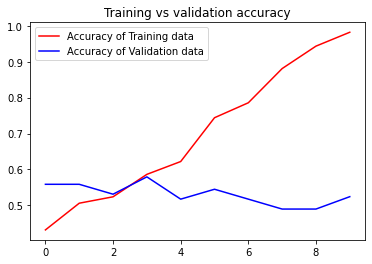

<Figure size 432x288 with 0 Axes>

In [120]:
get_acc = history_1.history['accuracy']
value_acc = history_1.history['val_accuracy']
get_loss = history_1.history['loss']
validation_loss = history_1.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

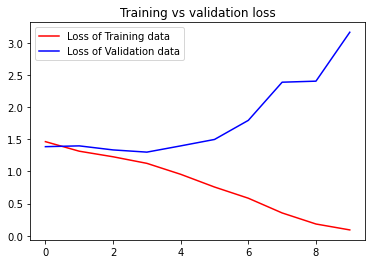

<Figure size 432x288 with 0 Axes>

In [121]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [105]:
train_data.class_indices

{'Flip Lops': 0,
 'Loafers': 1,
 'Sandals': 2,
 'Shoes': 3,
 'Sneakers': 4,
 'Soccer shoes': 5}

In [106]:
dic={}
for k,v in train_data.class_indices.items():
    dic[v]=k

In [107]:
dic

{0: 'Flip Lops',
 1: 'Loafers',
 2: 'Sandals',
 3: 'Shoes',
 4: 'Sneakers',
 5: 'Soccer shoes'}

In [110]:
from keras.preprocessing import image

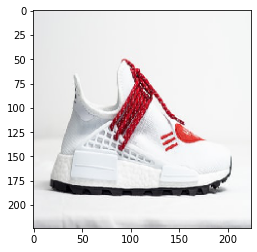

In [111]:
image_path="D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\sneakers\\image20.jpg"
img=image.load_img(image_path,target_size=(224,224,3))
plt.imshow(img)
plt.show()

In [112]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model_1.predict(images)
label=np.argmax(pred,axis=1)
print('Predicted: '+dic[np.argmax(pred)])

Predicted: Sneakers


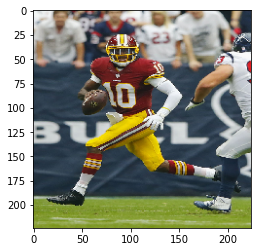

In [113]:
image_path="D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\training\\soccer_shoes\\image47.jpeg"
img=image.load_img(image_path,target_size=(224,224,3))
plt.imshow(img)
plt.show()

In [114]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model_1.predict(images)
label=np.argmax(pred,axis=1)
print('Predicted: '+dic[np.argmax(pred)])

Predicted: Soccer shoes


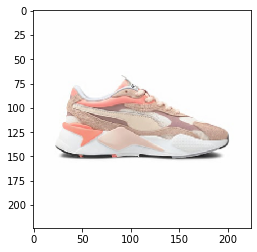

In [128]:
image_path="D:\\DATA SCIENCE\\Kaggle Projects\\13.SHOE CLASSIFICATION PROJECT\\shoeTypeClassifierDataset\\validation\\sneakers\\image251.jpg"
img=image.load_img(image_path,target_size=(224,224,3))
plt.imshow(img)
plt.show()

In [129]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model_1.predict(images)
label=np.argmax(pred,axis=1)
print('Predicted: '+dic[np.argmax(pred)])

Predicted: Sneakers
